Name:Mithunjai.E			24BAD071		21-02-2026
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   species  
0        0  
1        0  
2        0  
3        0  
4        0  

Target Names: ['setosa' 'versicolor' 'virginica']

Dataset Shape: (150, 5)

Class Distribution:
 species
0    50
1    50
2    50
Name: count, dtype: int64

Accuracy: 1.0
Precision (macro): 1.0
Recall (macro): 1.0
F1 Score (macro): 1.0

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00    

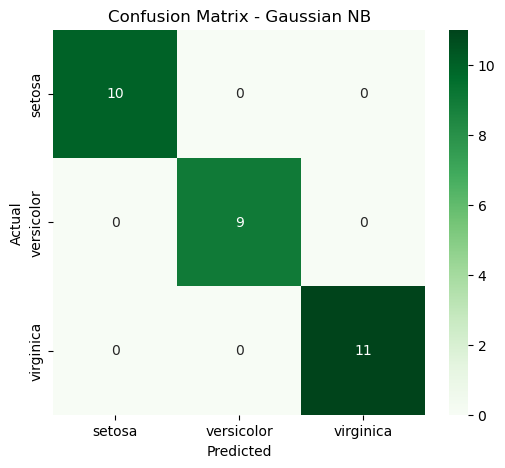

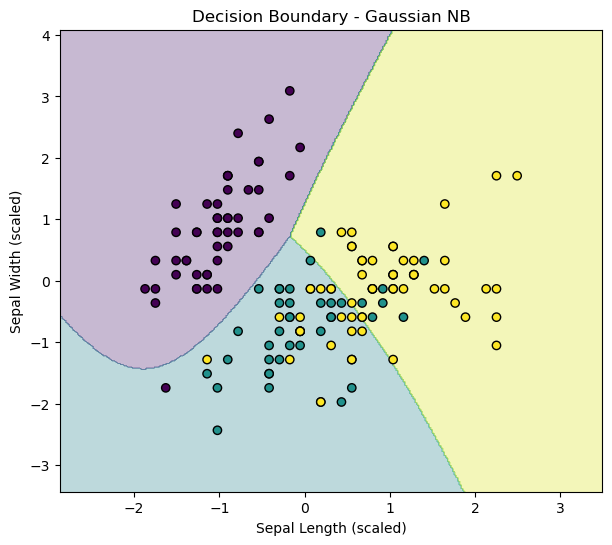

In [1]:
print("Name:Mithunjai.E\t\t\t24BAD071\t\t21-02-2026")

# 1. Import Required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression

# 2. Load Iris Dataset
iris = load_iris()
X = iris.data
y = iris.target

# Convert to DataFrame for inspection
df = pd.DataFrame(X, columns=iris.feature_names)
df['species'] = y

print(df.head())
print("\nTarget Names:", iris.target_names)

# 3. Data Inspection
print("\nDataset Shape:", df.shape)
print("\nClass Distribution:\n", df['species'].value_counts())

# 4. Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 5. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# 6. Train Gaussian Naive Bayes
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# 7. Predict Species
y_pred = gnb.predict(X_test)

# 8. Evaluation Metrics
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("Precision (macro):", precision_score(y_test, y_pred, average='macro'))
print("Recall (macro):", recall_score(y_test, y_pred, average='macro'))
print("F1 Score (macro):", f1_score(y_test, y_pred, average='macro'))

print("\nClassification Report:\n",
      classification_report(y_test, y_pred, target_names=iris.target_names))

# 9. Compare Predictions with Actual Labels
comparison = pd.DataFrame({
    "Actual": y_test,
    "Predicted": y_pred
})
print("\nSample Prediction Comparison:")
print(comparison.head())

# 10. Analyze Class Probabilities
probs = gnb.predict_proba(X_test)
print("\nFirst 5 Class Probabilities:\n", probs[:5])

# 11. Compare with Logistic Regression
lr = LogisticRegression(max_iter=200)
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)

print("\nLogistic Regression Accuracy:",
      accuracy_score(y_test, lr_pred))

# ---------------- VISUALIZATIONS ---------------- #

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens',
            xticklabels=iris.target_names,
            yticklabels=iris.target_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Gaussian NB")
plt.show()

# Decision Boundary Plot (Using first 2 features)
X2 = X_scaled[:, :2]
X_train2, X_test2, y_train2, y_test2 = train_test_split(
    X2, y, test_size=0.2, random_state=42
)

model2 = GaussianNB()
model2.fit(X_train2, y_train2)

# Create meshgrid
x_min, x_max = X2[:, 0].min() - 1, X2[:, 0].max() + 1
y_min, y_max = X2[:, 1].min() - 1, X2[:, 1].max() + 1

xx, yy = np.meshgrid(
    np.arange(x_min, x_max, 0.02),
    np.arange(y_min, y_max, 0.02)
)

Z = model2.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(7,6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')
plt.scatter(X2[:, 0], X2[:, 1], c=y, edgecolor='k')
plt.xlabel("Sepal Length (scaled)")
plt.ylabel("Sepal Width (scaled)")
plt.title("Decision Boundary - Gaussian NB")
plt.show()